# Test SVM on components/price data

In [1]:
import pandas as pd
import numpy as np

In [2]:
nb_components = 5
nb_samples = 100
# This is what we need to predict
price_per_component = np.array([i+1 for i in range(nb_components)])
data = np.random.randint(3, size=[nb_samples, nb_components]) 
columns = ['c_%s' % i for i in range(nb_components)]
prices = np.zeros((nb_samples))
prices[:] = np.dot(data[:, ...], price_per_component)
df = pd.DataFrame(data=data, columns=columns)
df['price'] = pd.Series(prices)

In [3]:
#print price_per_component, '\n', df

[1 2 3 4 5] 
    c_0  c_1  c_2  c_3  c_4  price
0     0    1    1    0    0    5.0
1     1    1    0    0    2   13.0
2     0    2    1    1    1   16.0
3     0    0    1    2    2   21.0
4     0    2    2    1    0   14.0
5     2    2    2    1    2   26.0
6     1    2    1    1    2   22.0
7     0    2    2    1    0   14.0
8     2    1    1    0    2   17.0
9     0    1    2    2    0   16.0
10    2    0    0    2    0   10.0
11    0    2    1    1    0   11.0
12    2    2    2    0    0   12.0
13    0    1    0    1    0    6.0
14    0    1    1    2    0   13.0
15    0    2    0    1    2   18.0
16    1    1    0    1    0    7.0
17    1    1    2    1    2   23.0
18    2    2    0    0    2   16.0
19    2    1    2    1    1   19.0
20    0    2    2    0    1   15.0
21    0    0    1    0    1    8.0
22    1    0    2    2    0   15.0
23    1    2    1    1    0   12.0
24    0    1    0    1    1   11.0
25    2    2    2    2    1   25.0
26    1    1    1    1    2   20.0
27    0

Train and test data

In [9]:
train_df = df.loc[:75]
test_df = df.loc[75:]

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


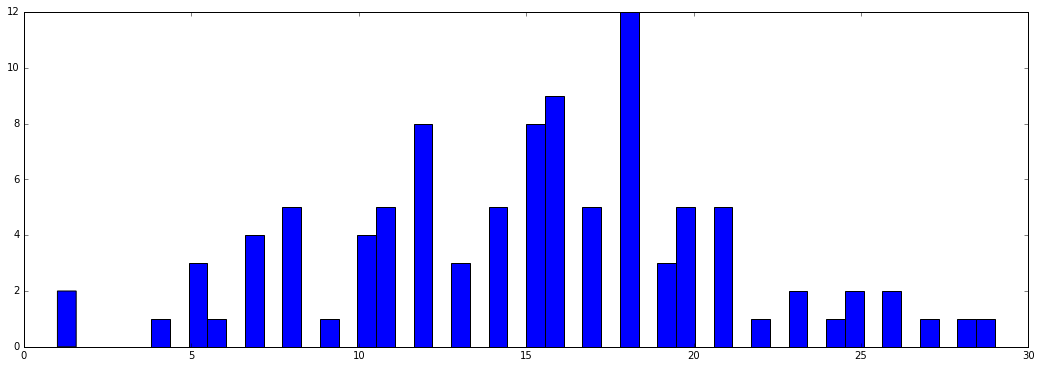

In [5]:
plt.figure(figsize=(18, 6))
out = plt.hist(df['price'], bins=50)

In [7]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR

In [8]:
# Mean Absolute Percentage Error
def mape_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [36]:
def crossVal(X, y, clf, scorer, n_splits=5, random_state=0, shuffle=False):

    folds= ms.KFold(n_splits=n_splits, shuffle= shuffle)
    
    # When shuffle=True, pseudo-random number generator state used for shuffling.
    # If None, use default numpy RNG for shuffling
    
    scoreList = []
    i = 0
    for trainIdx, testIdx in folds.split(X):
        i +=1 
        XTrainFolds = None; XTestFolds = None; yTrainFolds= None; yTestFolds= None
        yPred = []
        XTrainFolds, XTestFolds = X.iloc[trainIdx], X.iloc[testIdx]
        yTrainFolds, yTestFolds = y.iloc[trainIdx], y.iloc[testIdx]
        clf = clf.fit(XTrainFolds, yTrainFolds)
        res = clf.predict(XTestFolds)
        
        if "log" in config["featToTransform"]:
            score = scorer(np.exp(yTestFolds), np.exp(res))
        else:
            score = scorer(yTestFolds, res)
        
        scoreList.append(score)
        print "*** MAPE Error : " + str(i) + " - " + str(score)
        sys.stdout.flush()
        
    print "----------------"
    print "  - Mean :" + str(np.mean(scoreList))
    print "  - Ecart Max-Min :" + str(np.max(scoreList) - np.min(scoreList))

In [17]:
X = train_df.drop(['price'], axis=1)
y = train_df['price']
Z = test_df.drop(['price'], axis=1)
z = train_df['price']

In [19]:
from sklearn.model_selection import cross_val_score
clf = SVR(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_absolute_error')
scores                                              

array([-0.09269403, -0.0533865 , -0.0905947 , -0.0534336 , -0.05941322])

In [20]:
clf.predict(Z)


NotFittedError: This SVR instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.